In [2]:
import matplotlib.pyplot as plt

In [3]:
def plot_action_cruve(file_name):
    file=open(file_name,"r")
    actions=[]
    for line in file.readlines():
        action=line.split(",")
        for a in action:
            actions.append(a)
    lst=[]
    for a in actions:
        b=a.strip('[').strip(']').split(" ")
        lst.append(b)
    
    action_values=[]
    for l in lst:
        for s in l:
            if (s!='0.' and s!=""):
                    if s!=']':
                        s=s.rstrip("]")
                        action_values.append(float(s))                  
    
    plt.plot(action_values)

In [4]:
def plot_rewards(file_name):
    f=open(file_name,"r")
    R=[]
    for l in f:
        for r in l.split(','):
            R.append(r)
    Rewards=[]
    for r in R:
        if r!='':
            Rewards.append(float(r))
    plt.plot(Rewards)

### 目前的设定
* 让加了噪点以后的action参与训练
* 噪点模型采用较大的方差，theta=0.08,sigma=0.4


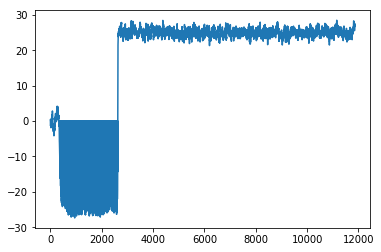

In [5]:
plot_action_cruve("actions_hover_01.txt")

#### 1. 继续调噪点方差
* 调大：theta = 0.07

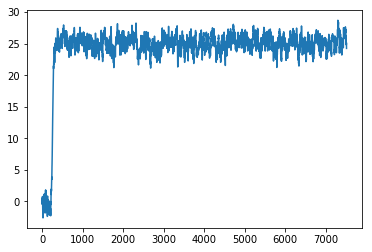

In [6]:
plot_action_cruve("actions_hover_02.txt")

* 再调小： theta =0.1

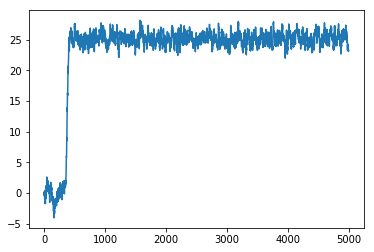

In [7]:
plot_action_cruve("actions_hover_03.txt")

* theta=0.09

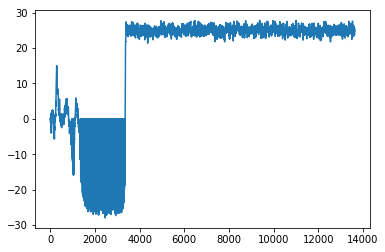

In [9]:
plot_action_cruve("actions_hover_04.txt")

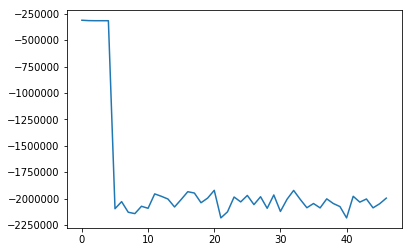

In [17]:
plot_rewards("rewards_hover_04.txt")

噪点参数暂定为 theta=0.09;sigma=0.4
#### 2. 调奖励函数

* 起飞惩罚和飞高惩罚都降低两个数量级

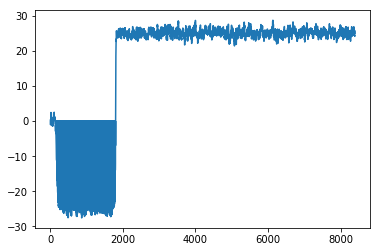

In [10]:
plot_action_cruve("actions_hover_05.txt")

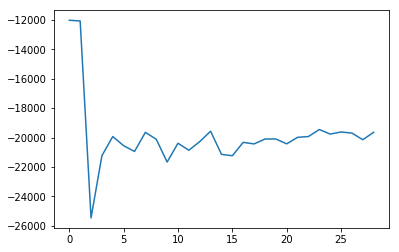

In [16]:
plot_rewards("rewards_hover_05.txt")

   * 重新调整  
   ```
   # 在5秒之内，takeoff
        
        if timestamp<=self.takeoff_duration:
            reward+=-abs(self.target_z - pose.position.z)*20
        else:
            
            # 5秒之后，需要保持高度稳定
            reward+=-abs(self.target_z - pose.position.z)*20
            
            # 如果高度跟目标高度差小于1,奖励加 bonus
            if abs(self.target_z - pose.position.z) < 0.5:
                reward+=10
            
            # 检查阶段是否结束
            if pose.position.z > 50:
                done=True
            if timestamp>self.max_duration:
                done=True
   ```
   

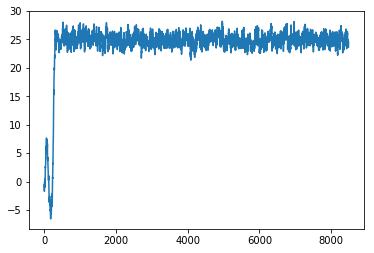

In [20]:
plot_action_cruve("actions_hover_06.txt")

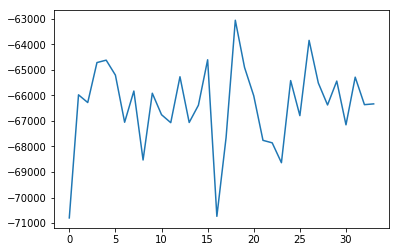

In [21]:
plot_rewards("rewards_hover_06.txt")

* 调大了方差 theta=0.07

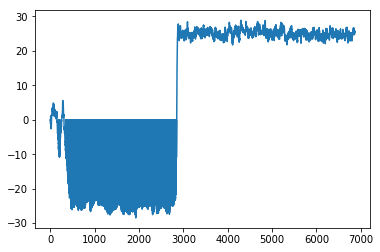

In [24]:
plot_action_cruve("actions_hover_07.txt")

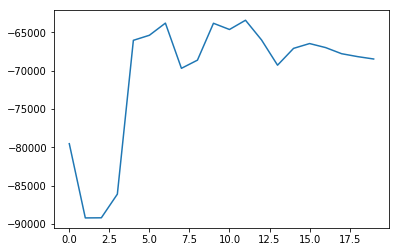

In [23]:
plot_rewards("rewards_hover_07.txt")

奖励函数仍然有问题，飞高相对在下面徘徊的惩罚更低
* 把飞高惩罚调大

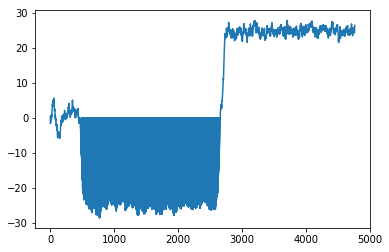

In [25]:
plot_action_cruve("actions_hover_08.txt")

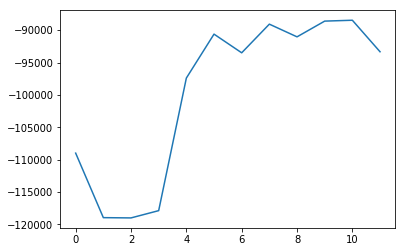

In [27]:
plot_rewards("rewards_hover_08.txt")

```
## 在5秒之内，takeoff      
        if timestamp<=self.takeoff_duration:
            reward+=-abs(self.target_z - pose.position.z)*20
            
        else:      
            ## 5秒之后，需要保持高度稳定
            
            if (pose.position.z > self.target_z+0.5) or (pose.position.z < self.target_z-0.5):
                reward+=-abs(self.target_z - pose.position.z)*30
            else:
                reward+=10
            
            # 检查阶段是否结束
            if pose.position.z > 50:
                reward+=-30
                done=True
            if timestamp>self.max_duration:
                done=True
```

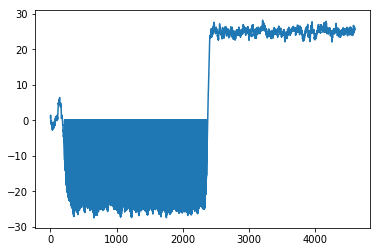

In [30]:
plot_action_cruve("actions_hover_09.txt")

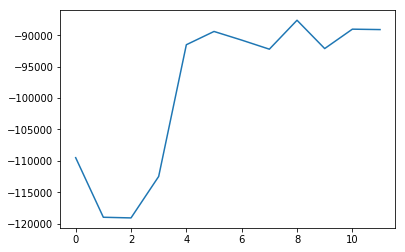

In [31]:
plot_rewards("rewards_hover_09.txt")

```
reward=-abs(self.target_z - pose.position.z)*20
       
        # 检查阶段是否结束
        if pose.position.z > 50:
            done=True
        if timestamp>self.max_duration:
            done=True
```

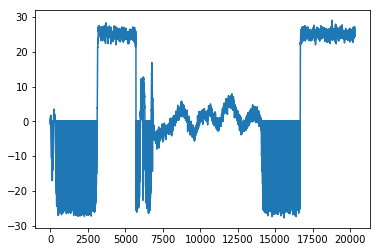

In [32]:
plot_action_cruve("actions_hover_10.txt")

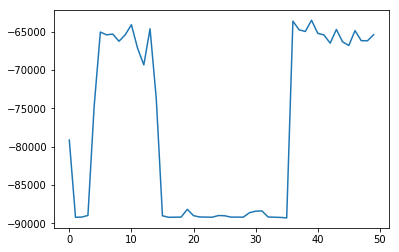

In [33]:
plot_rewards("rewards_hover_10.txt")

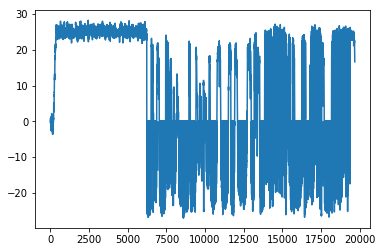

In [37]:
plot_action_cruve("actions_hover_12.txt")

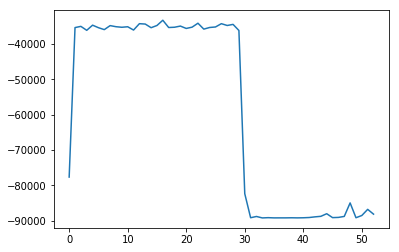

In [38]:
plot_rewards("rewards_hover_12.txt")

```
done = False
        
        if pose.position.z < self.target_z:
            reward=-(self.target_z - pose.position.z)*10
        else:
            reward=-(pose.position.z-self.target_z)*10
       
        # 检查阶段是否结束
        if pose.position.z > 20:
            done=True
        if timestamp > self.max_duration:
            done=True
  ```

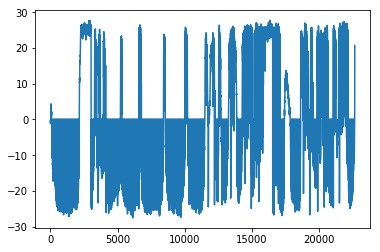

In [35]:
plot_action_cruve("actions_hover_11.txt")

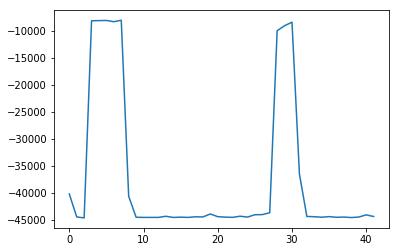

In [36]:
plot_rewards("rewards_hover_11.txt")

#### 奖励函数调整
* 奖励函数改为最简单的形式，只考虑与目标的差值惩罚
* 方差调小，theta=0.1 ; sigma=0.35


```
reward=-abs(self.target_z - pose.position.z)*20
       
        # 检查阶段是否结束
        if pose.position.z > 20:
            done=True
        if timestamp>self.max_duration:
            done=True
```

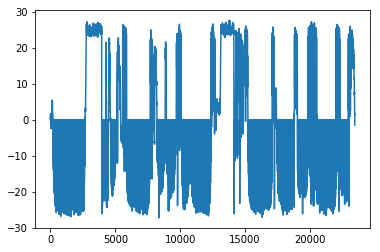

In [39]:
plot_action_cruve("actions_hover_13.txt")

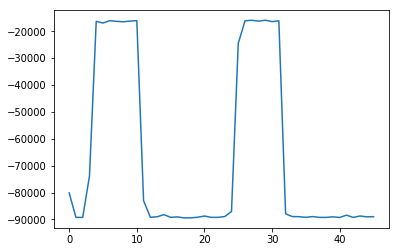

In [40]:
plot_rewards("rewards_hover_13.txt")

* 奖励函数调整
```
done = False
        
        reward=-abs(self.target_z - pose.position.z)*20
      
       if pose.position.z > 20:
            reward-=50
            done=True
        if timestamp > self.max_duration:
            done=True
```

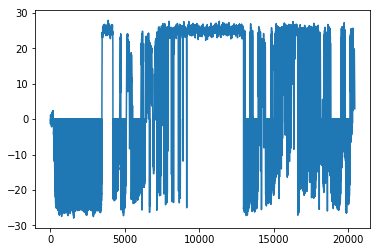

In [7]:
plot_action_cruve("actions_hover_14.txt")

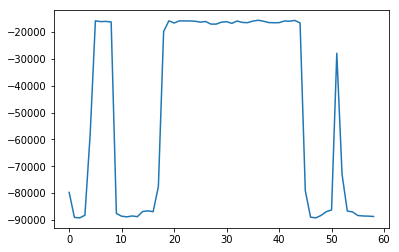

In [8]:
plot_rewards("rewards_hover_14.txt")